In [73]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler

In [57]:
#importing the dataset
hierClust = pd.read_csv("C:/Users/denis/OneDrive/Desktop/Thesis Project Stuff/Hierarchial Clustering/HierClustDataset.csv")

#checking the data
hierClust.head(10)

,Country,Time,Fossil fuel energy consumption (% of total),Electric power consumption (kWh per capita),Access to electricity (% of population),Gross national expenditure (% of GDP),Interest payments (% of revenue),GDP (Current $),GDP Growth (Yrly %),"Inflation, consumer prices (annual %)"
0,Albania,2021,56.22,2509.899825,100.0,113.324263,6.505615,1.803201e+10,8.969553,2.041472
1,Albania,2022,55.06,2507.480139,100.0,110.303936,7.327638,1.901724e+10,4.826688,6.725203
2,Albania,2023,86.92,2792.953671,100.0,105.163525,7.057279,2.354718e+10,3.936625,4.759764
3,Argentina,2021,87.40,2942.910775,100.0,96.945271,7.836614,4.865640e+11,10.441812,113.846387
4,Argentina,2022,86.96,2833.119098,100.0,98.529935,9.472594,6.327900e+11,5.269880,113.846387
5,Argentina,2023,47.23,9887.387658,100.0,101.708189,0.916646,6.460750e+11,-1.611002,113.846387
6,Armenia,2021,78.22,2262.093643,100.0,107.857009,10.944113,1.387891e+10,5.800000,7.184836
7,Armenia,2022,75.78,2403.677758,100.0,100.960817,9.859041,1.951351e+10,12.600000,8.640911
8,Armenia,2023,79.38,3804.004576,100.0,100.810472,11.108931,2.408575e+10,8.300000,1.980419
9,Australia,2021,91.53,9848.547495,100.0,96.189080,3.206561,1.556740e+12,2.111168,2.863910


In [ ]:
#dropping the columns that are not needed for clustering
hierClust.drop(['Country', 'Time'], axis=1, inplace=True)

In [59]:
scaler = StandardScaler()
hierClustScaled = scaler.fit_transform(hierClust)

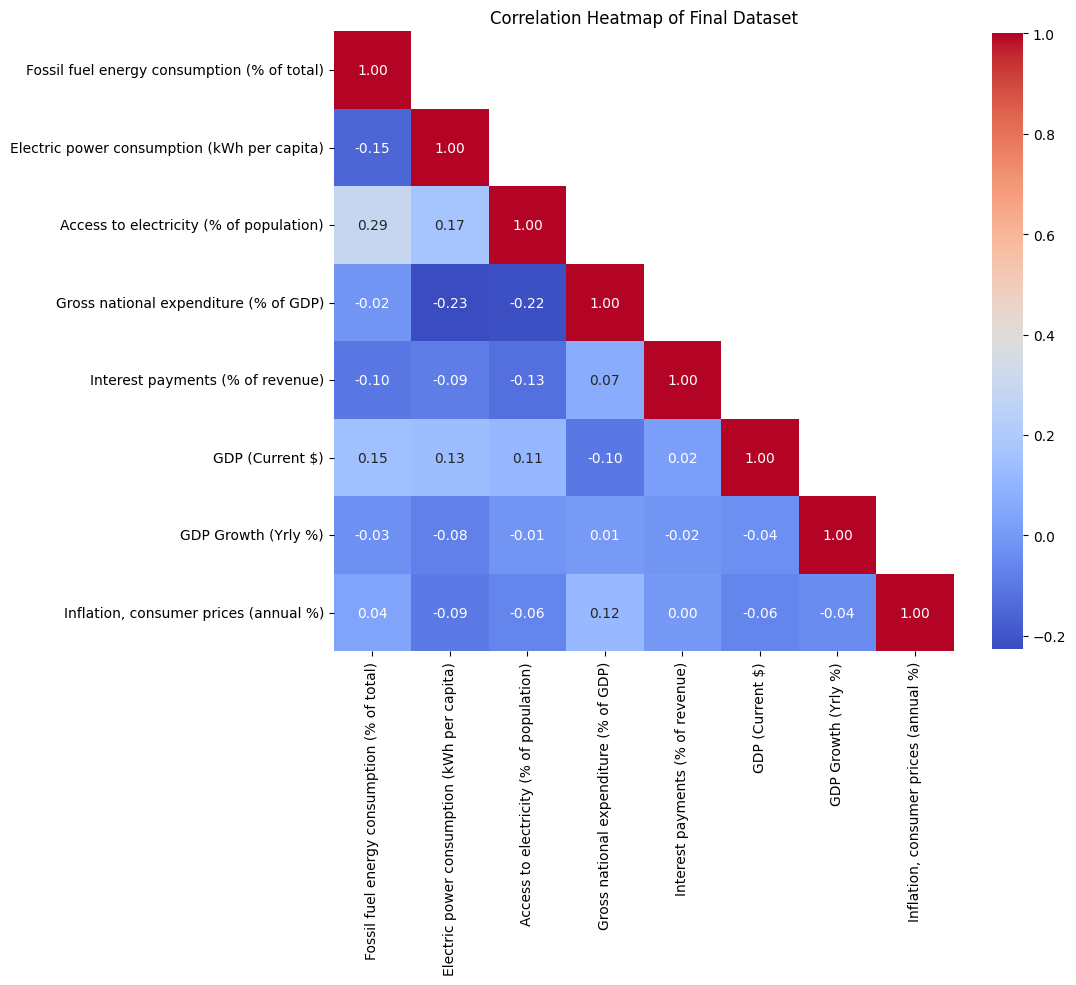

In [61]:
#correlation matrix
correlationMatrix = hierClust.corr()

#masking the upper triangle of the correlation matrix
matrix = np.triu(correlationMatrix, k=1)

#heatmap of finalDatasetCleaned
plt.figure(figsize=(10, 10))
sns.heatmap(correlationMatrix, mask = matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Final Dataset')
plt.show()

In [63]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler


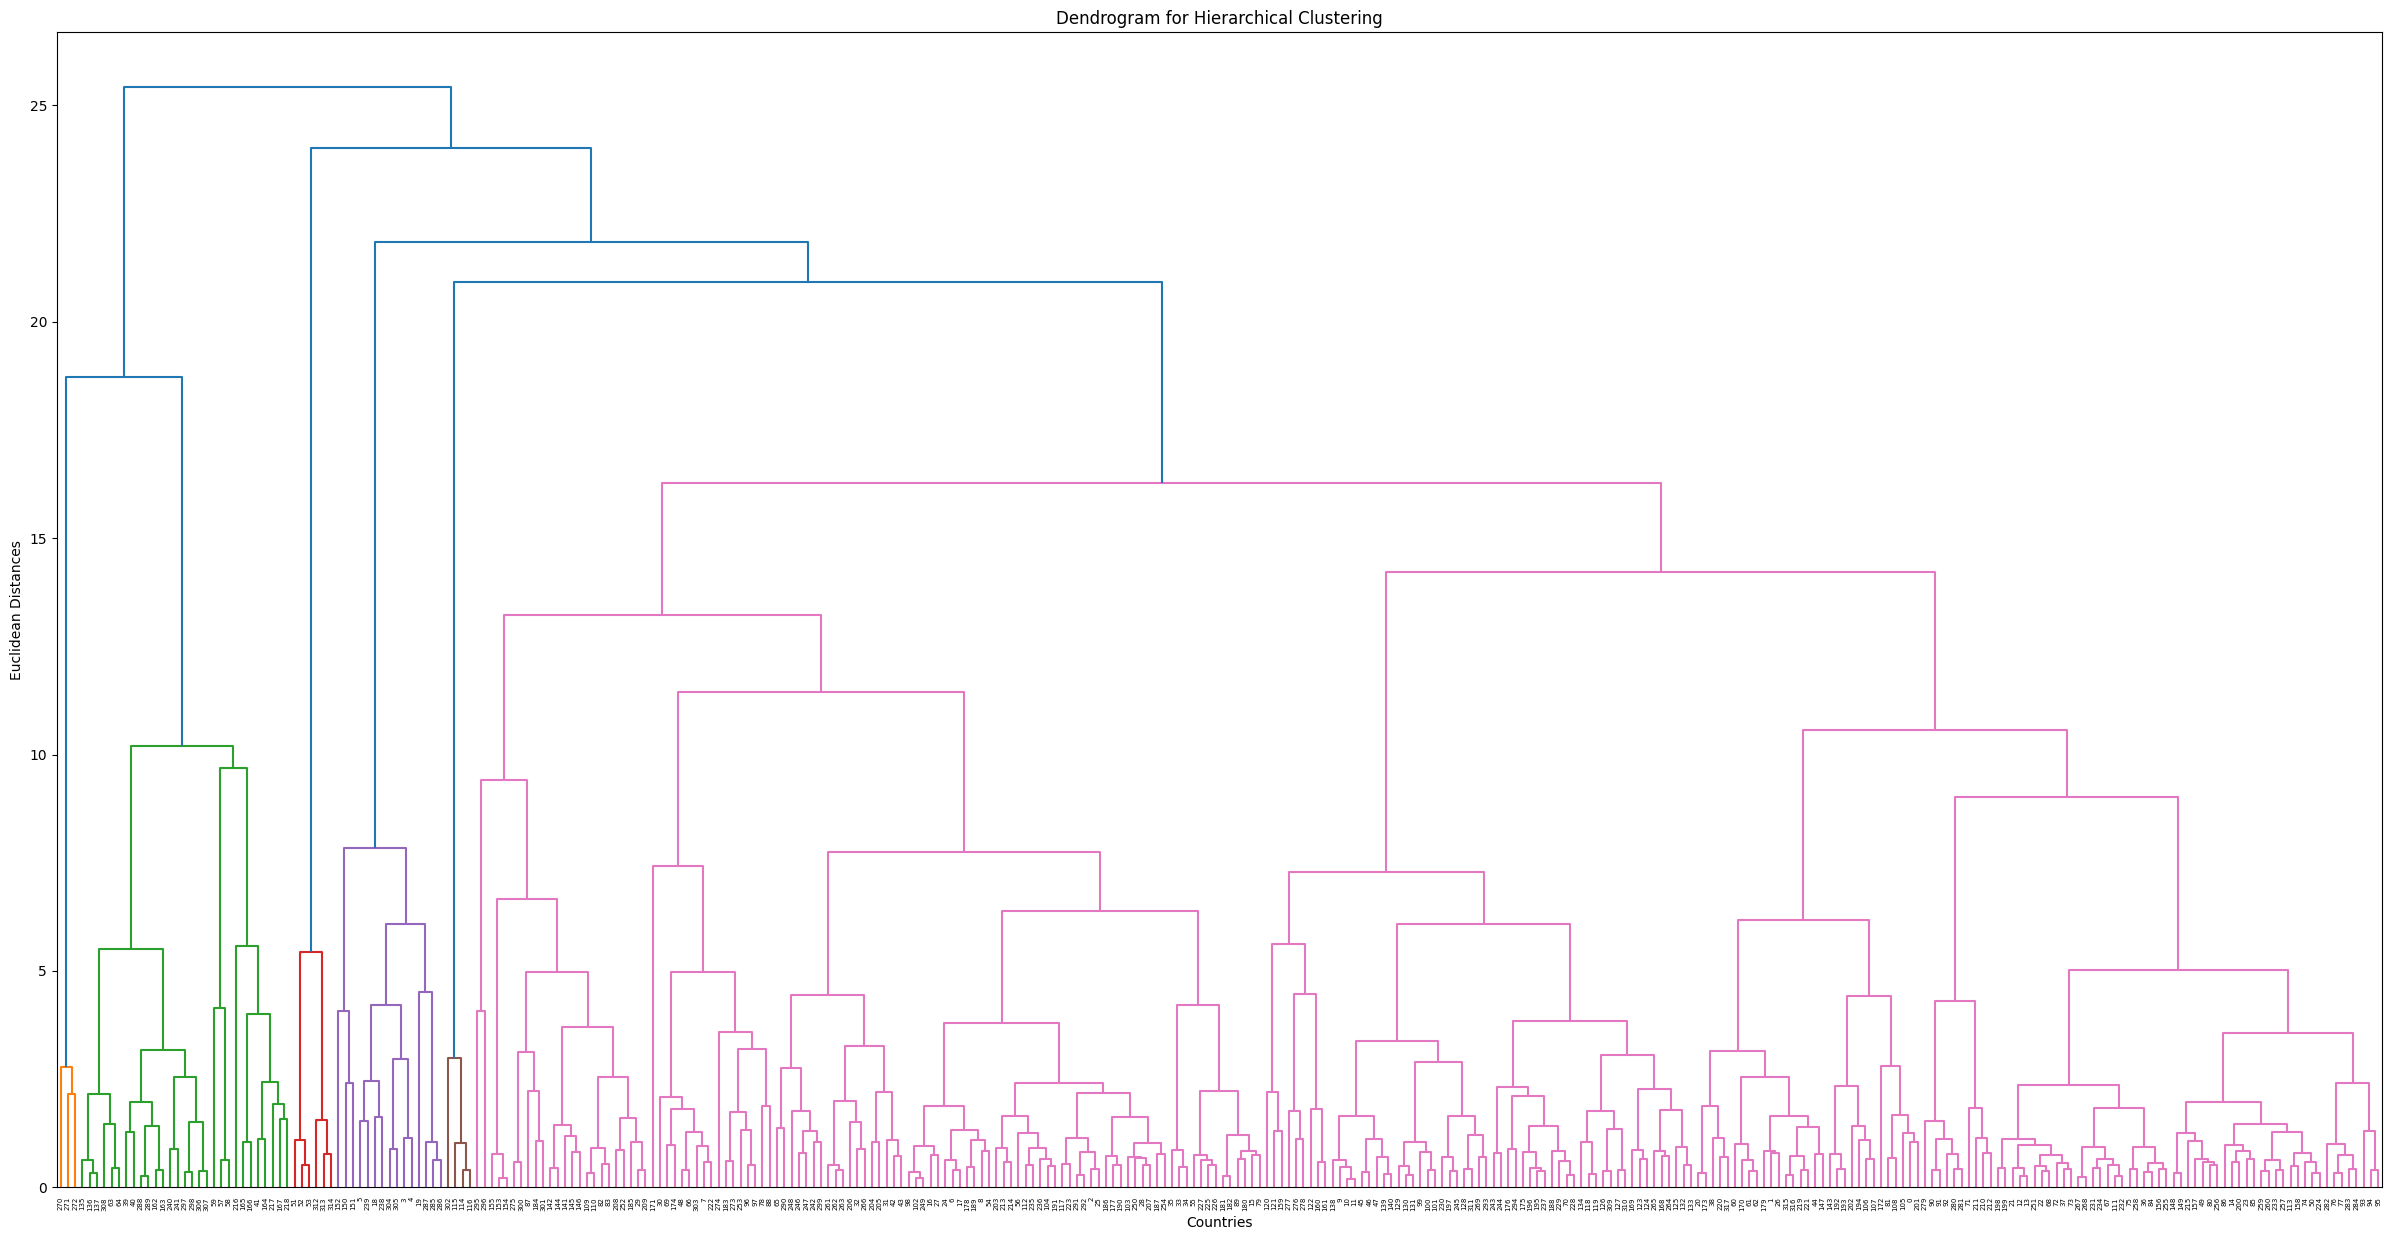

In [64]:
plt.figure(figsize=(30, 15))
dendrogram = sch.dendrogram(sch.linkage(hierClustScaled, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Countries')
plt.ylabel('Euclidean Distances')
plt.show()

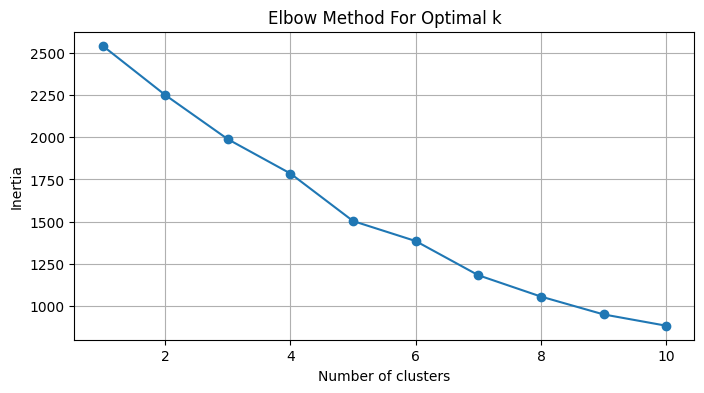

In [104]:
#Convert the scaled data back to a DataFrame
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(hierClustScaled)
    inertia.append(kmeans.inertia_)

#Plot elbow curve
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [ ]:
#creating hierarchical clustering model with Ward's method
hierarchical = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')

#fitting the model to the data
hierarchical.fit(hierClustScaled)

#getting the cluster labels
labels = hierarchical.labels_

#adding the cluster labels to the original dataset
hierClust['Cluster'] = labels

#displaying the first 10 rows of the dataset with cluster labels
hierClust.head(10)


,Fossil fuel energy consumption (% of total),Electric power consumption (kWh per capita),Access to electricity (% of population),Gross national expenditure (% of GDP),Interest payments (% of revenue),GDP (Current $),GDP Growth (Yrly %),"Inflation, consumer prices (annual %)",Cluster,Country,Time
0,56.22,2509.899825,100.0,113.324263,6.505615,1.803201e+10,8.969553,2.041472,1,Albania,2021
1,55.06,2507.480139,100.0,110.303936,7.327638,1.901724e+10,4.826688,6.725203,1,Albania,2022
2,86.92,2792.953671,100.0,105.163525,7.057279,2.354718e+10,3.936625,4.759764,1,Albania,2023
3,87.40,2942.910775,100.0,96.945271,7.836614,4.865640e+11,10.441812,113.846387,3,Argentina,2021
4,86.96,2833.119098,100.0,98.529935,9.472594,6.327900e+11,5.269880,113.846387,3,Argentina,2022
5,47.23,9887.387658,100.0,101.708189,0.916646,6.460750e+11,-1.611002,113.846387,3,Argentina,2023
6,78.22,2262.093643,100.0,107.857009,10.944113,1.387891e+10,5.800000,7.184836,1,Armenia,2021
7,75.78,2403.677758,100.0,100.960817,9.859041,1.951351e+10,12.600000,8.640911,1,Armenia,2022
8,79.38,3804.004576,100.0,100.810472,11.108931,2.408575e+10,8.300000,1.980419,1,Armenia,2023
9,91.53,9848.547495,100.0,96.189080,3.206561,1.556740e+12,2.111168,2.863910,1,Australia,2021


In [76]:
#print cluster column unique values
print(hierClust['Cluster'].unique())

[1 3 0 2 4]


In [ ]:
#adding back the 'Country' and 'Time' columns
hierClust['Country'] = pd.read_csv("C:/Users/denis/OneDrive/Desktop/Thesis Project Stuff/Hierarchial Clustering/HierClustDataset.csv")['Country']
hierClust['Time'] = pd.read_csv("C:/Users/denis/OneDrive/Desktop/Thesis Project Stuff/Hierarchial Clustering/HierClustDataset.csv")['Time']

#displaying the first 10 rows of the dataset with cluster labels
hierClust.head(10)

,Fossil fuel energy consumption (% of total),Electric power consumption (kWh per capita),Access to electricity (% of population),Gross national expenditure (% of GDP),Interest payments (% of revenue),GDP (Current $),GDP Growth (Yrly %),"Inflation, consumer prices (annual %)",Cluster,Country,Time
0,56.22,2509.899825,100.0,113.324263,6.505615,1.803201e+10,8.969553,2.041472,1,Albania,2021
1,55.06,2507.480139,100.0,110.303936,7.327638,1.901724e+10,4.826688,6.725203,1,Albania,2022
2,86.92,2792.953671,100.0,105.163525,7.057279,2.354718e+10,3.936625,4.759764,1,Albania,2023
3,87.40,2942.910775,100.0,96.945271,7.836614,4.865640e+11,10.441812,113.846387,3,Argentina,2021
4,86.96,2833.119098,100.0,98.529935,9.472594,6.327900e+11,5.269880,113.846387,3,Argentina,2022
5,47.23,9887.387658,100.0,101.708189,0.916646,6.460750e+11,-1.611002,113.846387,3,Argentina,2023
6,78.22,2262.093643,100.0,107.857009,10.944113,1.387891e+10,5.800000,7.184836,1,Armenia,2021
7,75.78,2403.677758,100.0,100.960817,9.859041,1.951351e+10,12.600000,8.640911,1,Armenia,2022
8,79.38,3804.004576,100.0,100.810472,11.108931,2.408575e+10,8.300000,1.980419,1,Armenia,2023
9,91.53,9848.547495,100.0,96.189080,3.206561,1.556740e+12,2.111168,2.863910,1,Australia,2021


In [103]:
# list of countries in each cluster as a list
cluster1 = hierClust[hierClust['Cluster'] == 0]['Country'].tolist()
cluster2 = hierClust[hierClust['Cluster'] == 1]['Country'].tolist()
cluster3 = hierClust[hierClust['Cluster'] == 2]['Country'].tolist()
cluster4 = hierClust[hierClust['Cluster'] == 3]['Country'].tolist()
cluster5 = hierClust[hierClust['Cluster'] == 4]['Country'].tolist()


print("Cluster 1 countries:", cluster_0)
print("Cluster 2 countries:", cluster_1)
print("Cluster 3 countries:", cluster_2)
print("Cluster 4 countries:", cluster_3)
print("Cluster 5 countries:", cluster_4)

Cluster 1 countries: ['Burkina Faso', 'Congo, Dem. Rep.', "Cote d'Ivoire", 'Kenya', 'Madagascar', 'Malawi', 'Papua New Guinea', 'Rwanda', 'Sri Lanka', 'Tanzania', 'Togo', 'Uganda']
Cluster 2 countries: ['Albania', 'Armenia', 'Australia', 'Austria', 'Bangladesh', 'Barbados', 'Belgium', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Chile', 'Colombia', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Dominican Republic', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Guatemala', 'Honduras', 'Hungary', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Korea, Rep.', 'Kosovo', 'Kyrgyz Republic', 'Latvia', 'Lesotho', 'Lithuania', 'Luxembourg', 'Malaysia', 'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Morocco', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria', 'North Macedonia', 'Norway', 'Pakistan', 'Paraguay', 'Peru', 'Philippi

In [102]:
#list of unique countries in each cluster as a list
cluster1 = hierClust[hierClust['Cluster'] == 0]['Country'].unique().tolist()
cluster2 = hierClust[hierClust['Cluster'] == 1]['Country'].unique().tolist()
cluster3 = hierClust[hierClust['Cluster'] == 2]['Country'].unique().tolist()
cluster4 = hierClust[hierClust['Cluster'] == 3]['Country'].unique().tolist()
cluster5 = hierClust[hierClust['Cluster'] == 4]['Country'].unique().tolist()

print("Cluster 1 countries:", cluster_0)
print("Cluster 2 countries:", cluster_1)
print("Cluster 3 countries:", cluster_2)
print("Cluster 4 countries:", cluster_3)
print("Cluster 5 countries:", cluster_4)

Cluster 1 countries: ['Burkina Faso', 'Congo, Dem. Rep.', "Cote d'Ivoire", 'Kenya', 'Madagascar', 'Malawi', 'Papua New Guinea', 'Rwanda', 'Sri Lanka', 'Tanzania', 'Togo', 'Uganda']
Cluster 2 countries: ['Albania', 'Armenia', 'Australia', 'Austria', 'Bangladesh', 'Barbados', 'Belgium', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Chile', 'Colombia', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Dominican Republic', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Guatemala', 'Honduras', 'Hungary', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Korea, Rep.', 'Kosovo', 'Kyrgyz Republic', 'Latvia', 'Lesotho', 'Lithuania', 'Luxembourg', 'Malaysia', 'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Morocco', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria', 'North Macedonia', 'Norway', 'Pakistan', 'Paraguay', 'Peru', 'Philippi

In [ ]:
#Extract countries by cluster
clusteredCountries = {f"    {i}": hierClust[hierClust['Cluster'] == i]['Country'].unique().tolist()
    for i in sorted(hierClust['Cluster'].unique())}

#Find the max length of any cluster list to align the columns
maxLen = max(len(countries) for countries in clusteredCountries.values())

#Normalize the lengths by padding with empty strings
for key in clusteredCountries:
    clusteredCountries[key] += [""] * (maxLen - len(clusteredCountries[key]))

#Convert to DataFrame for better display
clusterData = pd.DataFrame(clusteredCountries)

#Print as a formatted table
print(tabulate(clusterData, headers='keys', tablefmt='fancy_grid', showindex=False))


╒══════════════════╤════════════════════════╤═════════════════╤════════════════════╤═════════════════╕
│     Cluster 1    │     Cluster 2          │     Cluster 3   │     Cluster 4      │     Cluster 5   │
╞══════════════════╪════════════════════════╪═════════════════╪════════════════════╪═════════════════╡
│ Burkina Faso     │ Albania                │ China           │ Argentina          │ Iceland         │
├──────────────────┼────────────────────────┼─────────────────┼────────────────────┼─────────────────┤
│ Congo, Dem. Rep. │ Armenia                │ United States   │ Barbados           │ Tonga           │
├──────────────────┼────────────────────────┼─────────────────┼────────────────────┼─────────────────┤
│ Cote d'Ivoire    │ Australia              │                 │ Lebanon            │                 │
├──────────────────┼────────────────────────┼─────────────────┼────────────────────┼─────────────────┤
│ Kenya            │ Austria                │                 │ Russian F

C:\Users\denis\AppData\Local\Temp\ipykernel_7612\3883206664.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=hierClust, palette='Set2')


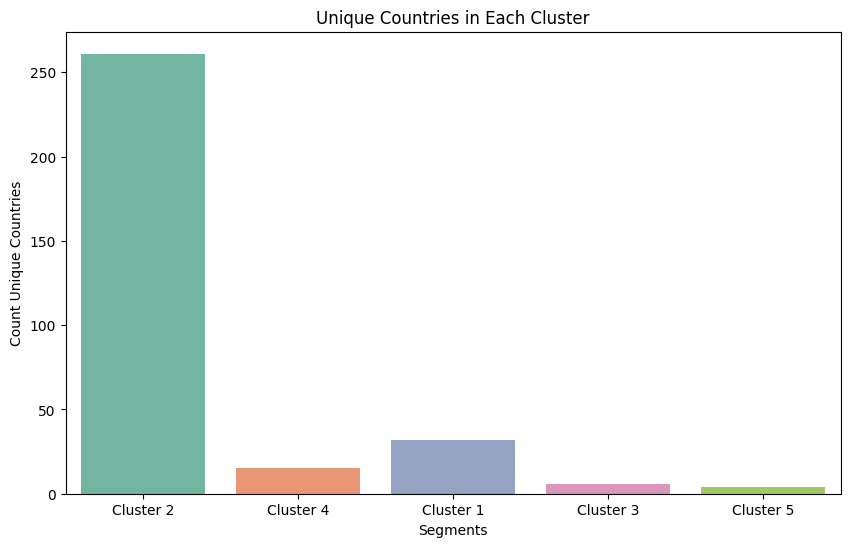

In [99]:
#count of unique countries in each cluster as a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=hierClust, palette='Set2')
plt.title('Unique Countries in Each Cluster')
plt.xlabel('Segments')
plt.ylabel('Count Unique Countries')
plt.xticks(rotation=0)
plt.show()

C:\Users\denis\AppData\Local\Temp\ipykernel_7612\3224362125.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Unique Country Count', data=clusterCounts, palette='Set2')


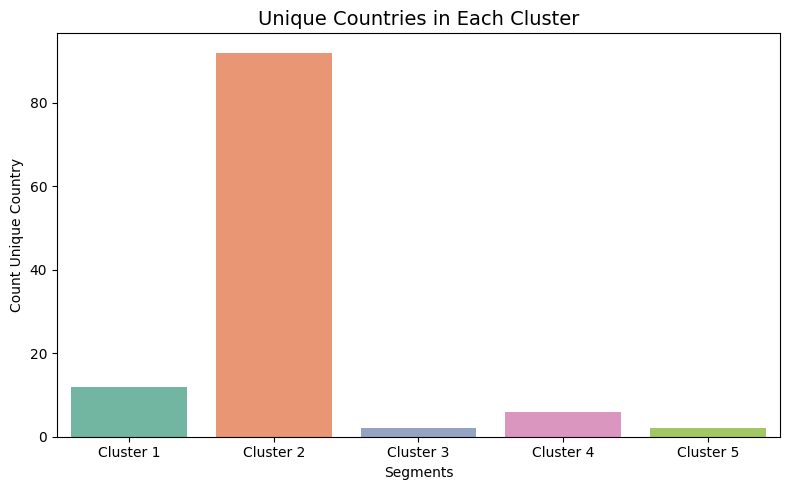

In [ ]:
#Count unique countries in each cluster
clusterCounts = (hierClust.groupby('Cluster')['Country'].nunique().reset_index().rename(columns={'Country': 'Unique Country Count'}))

#Plot the count of unique countries in each cluster as a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Cluster', y='Unique Country Count', data=clusterCounts, palette='Set2')
plt.title('Unique Countries in Each Cluster', fontsize=14)
plt.xlabel('Segments', fontsize=10)
plt.ylabel('Count Unique Country', fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()